# 주제 : 사전 학습된 keras 속의 CNN 모델을 이용하여 포켓몬의 유사도 구하기
* 데이터 : https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types

In [1]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.applications import vgg16, resnet50
from tensorflow.keras.models import Model
from keras.applications.resnet50 import preprocess_input
from PIL import Image
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy import dot
from numpy.linalg import norm

import os
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
class FeatureExtractor:
    def __init__(self, weights: str = "imagenet", color_type: str = "RGB"):
        base_model = tf.keras.applications.VGG16(weights=weights)
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer("fc1").output)
        self.color_type = color_type
        
    def _convert_url(self, url):
        return Image.open(requests.get(url, stream=True).raw)
        
    def get_feature(self, url):
        images = self._convert_url(url)
        
        return self.model.get_extract(images)

    def get_extract(self, img):
        img = img.resize((224, 224))
        img = img.convert(self.color_type) 

        x = np.array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = self.model.predict(x)[0]

        return feature / norm(feature)

In [3]:
def subplots(image1_name, image2_name):    
    first_five = [image1_name, image2_name]
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))
    
    for k in range(2):
        state = os.path.join(root_dir, first_five[k])
        img = Image.open(state)
        axes[k].imshow(img)

In [4]:
root_dir = "./data/images/images"
files =  os.path.join(root_dir)
File_names = os.listdir(files)

In [5]:
fe = FeatureExtractor()

In [6]:
def _cos_sin(A, B):
    return dot(A, B) / (norm(A) * norm(B))

In [7]:
# 포켓몬의 이름을 바꾸면 유사도를 구할 수 있음

image1_name = 'audino.png'
image2_name = 'blissey.png'

image1_path = os.path.join(root_dir, image1_name)
image2_path = os.path.join(root_dir, image2_name)

image1 = fe.get_extract(img=Image.open(image1_path))
image2 = fe.get_extract(img=Image.open(image2_path))

cosine_similarity = _cos_sin(image1, image2)
print(f"두 이미지의 유사도:", round(cosine_similarity, 2))

1/1 [==============================] - 0s 264ms/step
두 이미지의 유사도: 0.55


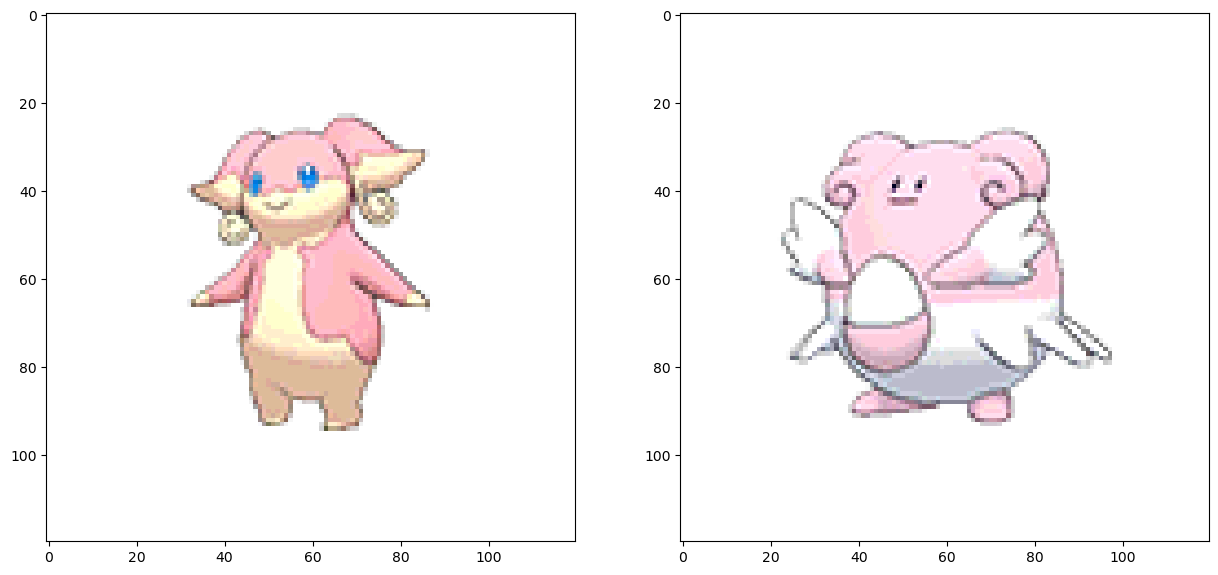

In [8]:
subplots(image1_name, image2_name)